In [2]:
import pandas as pd
import requests 
import json 
import csv 
import time
import datetime
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve

In [3]:
df_p = pd.read_csv('../data/askphilosophy.csv', index_col=0)
df_c = pd.read_csv('../data/changemyview.csv', index_col=0)

In [4]:
df_c['title'] =  df_c['title'].replace(to_replace ='CMV: ', value = '', regex = True)
df_c['title'] =  df_c['title'].replace(to_replace ='CMC: ', value = '', regex = True)
df_c['title'] =  df_c['title'].replace(to_replace ='Cmv: ', value = '', regex = True)
df_c['title'] =  df_c['title'].replace(to_replace ='cmv: ', value = '', regex = True)

In [5]:
df = df_c.append(df_p)

In [6]:
# df['subreddit'] = df['subreddit'].replace({'askphilosophy':0, 'changemyview': 1})
df['subreddit'] = df['subreddit'].replace({'askphilosophy':1, 'changemyview': 0})

In [7]:
X = df['title']
y = df['subreddit']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 22)

In [9]:
pipe = make_pipeline(CountVectorizer(stop_words = 'english', max_features = 500),
                    StandardScaler(with_mean = False),
                    LogisticRegression())

In [10]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(max_features=500, stop_words='english')),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('logisticregression', LogisticRegression())])

In [11]:
pipe.score(X_train, y_train)

0.8615075376884422

In [12]:
pipe.score(X_test, y_test)

0.8404020100502513

In [13]:
y_lr_preds = pipe.predict(X_test)

In [14]:
conf_mat = confusion_matrix(y_test, y_lr_preds)
print(conf_mat)

[[2214  282]
 [ 512 1967]]


In [15]:
tn, fp, fn,tp = confusion_matrix(y_test, y_lr_preds).ravel()
print(tn, fp, fn,tp)

2214 282 512 1967


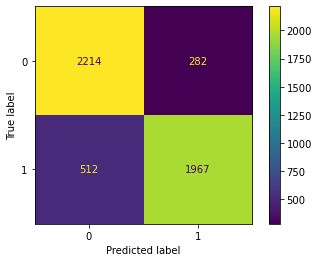

In [16]:
plot_confusion_matrix(pipe, X_test,  y_test)

In [17]:
coefs = pipe.named_steps['logisticregression'].coef_

In [18]:
coef_df = pd.DataFrame({'coefs': coefs[0]}, 
                       index = pipe.named_steps['countvectorizer'].get_feature_names())

In [19]:
coef_df.nlargest(10, 'coefs')

,coefs
philosophy,1.636010
philosophers,1.172482
kant,0.839584
philosophical,0.766353
philosopher,0.680404
question,0.617820
nietzsche,0.606616
plato,0.583498
realism,0.569104
socrates,0.552234


In [20]:
coef_df.nsmallest(10, 'coefs')

,coefs
cmv,-1.083951
trump,-0.516874
usa,-0.489465
gun,-0.478591
biden,-0.457380
healthcare,-0.452885
looting,-0.415743
protests,-0.412229
protesting,-0.398190
police,-0.367203


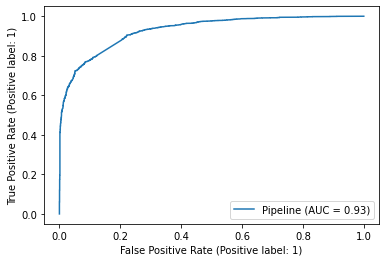

In [21]:
plot_roc_curve(pipe, X_test, y_test);

In [31]:
precision = tp / (tp+fp)
recall = tp / (tp+fn)
specificity = tn/(tn+fp)
balanced_accuracy = (specificity + recall)/2
ac = accuracy_score(y_test, y_lr_preds)
fpr = fp / (fp+tn) # False Positive Rate 
print(f" Precision: {precision}")
print(f" Recall: {recall}")
print(f" Specificity: {recall}")
print(f" Balanced Accuracy: {balanced_accuracy}")
print(f" Accuracy Score: {ac}")
print(f" False Positive Rate : {fpr}")

 Precision: 0.8746109381947532
 Recall: 0.7934651068979427
 Specificity: 0.7934651068979427
 Balanced Accuracy: 0.8402421688335867
 Accuracy Score: 0.8404020100502513
 False Positive Rate : 0.11298076923076923
